In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk

In [2]:
df = pd.read_csv('../Data/raw_analyst_ratings.csv')

In [3]:
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


In [5]:
# 1. Descriptive Statistics on Headline Length
df['headline_length'] = df['headline'].apply(len)
headline_stats = df['headline_length'].describe()
print("Headline Length Statistics:")
print(headline_stats)

Headline Length Statistics:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


In [6]:
# 2. Article Count per Publisher
publisher_counts = df['publisher'].value_counts()
print("\nNumber of Articles per Publisher:")
print(publisher_counts)


Number of Articles per Publisher:
publisher
Paul Quintaro                      228373
Lisa Levin                         186979
Benzinga Newsdesk                  150484
Charles Gross                       96732
Monica Gerson                       82380
                                    ...  
Shazir Mucklai - Imperium Group         1
Laura Jennings                          1
Eric Martin                             1
Jose Rodrigo                            1
Jeremie Capron                          1
Name: count, Length: 1034, dtype: int64


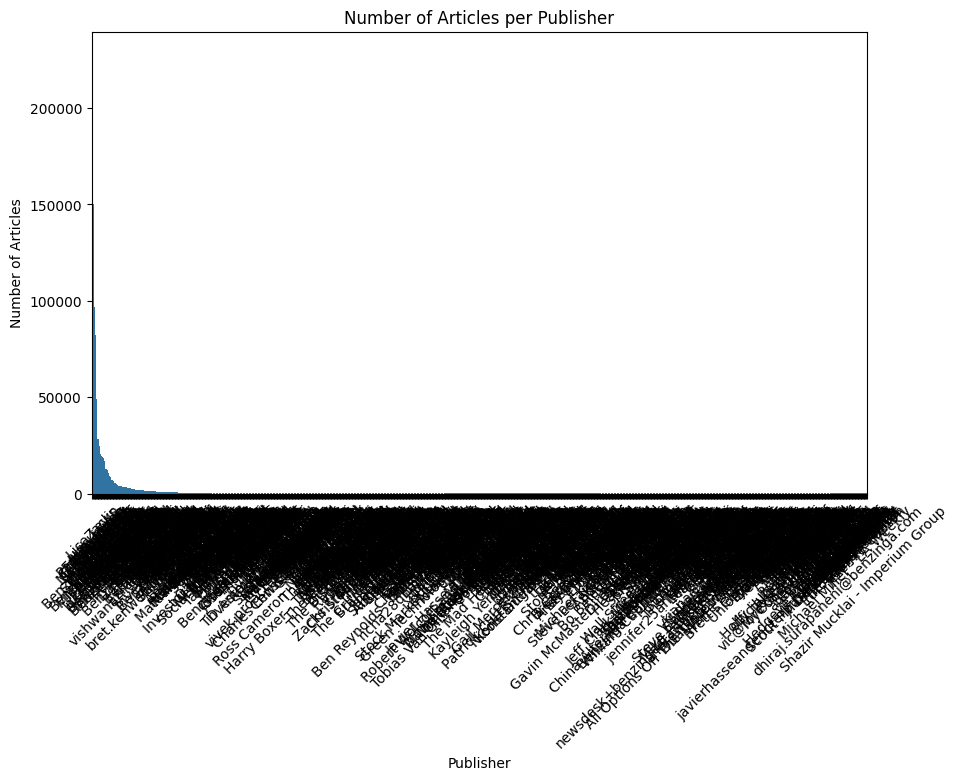

In [7]:
# Plot the article count per publisher
plt.figure(figsize=(10, 6))
sns.barplot(x=publisher_counts.index, y=publisher_counts.values)
plt.title('Number of Articles per Publisher')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()

In [8]:
# 3. Analysis of Publication Dates
# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Check if the conversion was successful and drop rows where conversion failed
df = df.dropna(subset=['date'])

# Group by day and count the number of articles published
daily_counts = df.groupby(df['date'].dt.date).size()

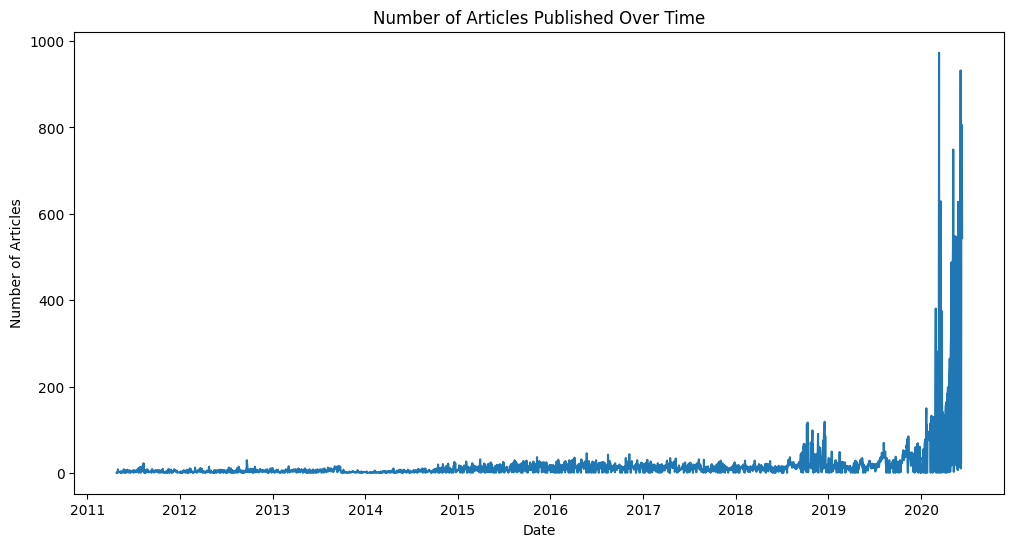

In [9]:
# Display the daily publication trend
plt.figure(figsize=(12, 6))
daily_counts.plot()
plt.title('Number of Articles Published Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()

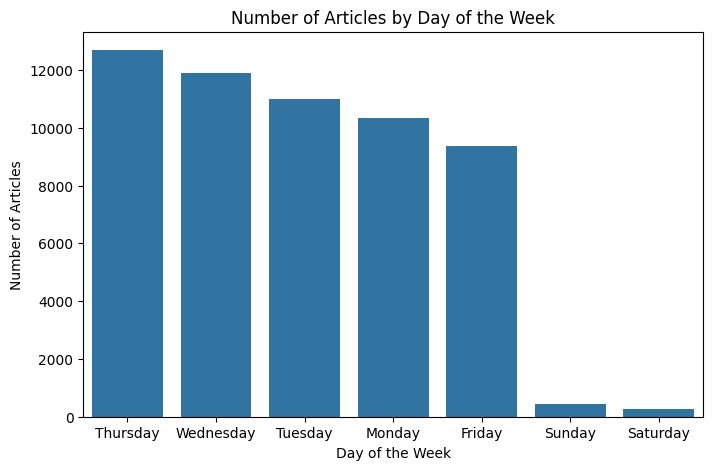

In [10]:
# Analyze trends by day of the week
df['day_of_week'] = df['date'].dt.day_name()
day_of_week_counts = df['day_of_week'].value_counts()

# Plot the number of articles by day of the week
plt.figure(figsize=(8, 5))
sns.barplot(x=day_of_week_counts.index, y=day_of_week_counts.values)
plt.title('Number of Articles by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Articles')
plt.show()


In [11]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd

# Download VADER lexicon
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Coop\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [12]:
# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to determine sentiment
def analyze_sentiment(text):
    sentiment_scores = sia.polarity_scores(text)
    if sentiment_scores['compound'] >= 0.05:
        return 'positive'
    elif sentiment_scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis
df['sentiment'] = df['headline'].apply(analyze_sentiment)

# Display the DataFrame with sentiment
print(df[['headline', 'sentiment']])


                                                  headline sentiment
0                  Stocks That Hit 52-Week Highs On Friday   neutral
1               Stocks That Hit 52-Week Highs On Wednesday   neutral
2                            71 Biggest Movers From Friday   neutral
3             46 Stocks Moving In Friday's Mid-Day Session   neutral
4        B of A Securities Maintains Neutral on Agilent...  positive
...                                                    ...       ...
1407266  Chinese Nano-Cap Momentum Stocks Sharply Highe...  positive
1407267  28 Stocks Moving In Wednesday's Pre-Market Ses...   neutral
1407268  China Zenix Auto International Reports Q3 EPAD...   neutral
1407269                   46 Biggest Movers From Yesterday   neutral
1407270      42 Stocks Moving In Tuesday's Mid-Day Session   neutral

[55987 rows x 2 columns]


In [13]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Coop\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Coop\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Coop\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Coop\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [14]:
import os
import sys

rpath = os.path.abspath('..')
if rpath not in sys.path:
    sys.path.insert(0, rpath)

In [21]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer



# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english', max_features=10)

# Fit and transform the data
tfidf_matrix = tfidf.fit_transform(df['headline'])

# Get the feature names
feature_names = tfidf.get_feature_names_out()

# Sum the TF-IDF scores for each feature over all documents
sum_tfidf = tfidf_matrix.sum(axis=0)

# Extract keywords with their scores
keywords = [(feature_names[i], sum_tfidf[0, i]) for i in range(len(feature_names))]

# Sort keywords by their scores in descending order
keywords = sorted(keywords, key=lambda x: x[1], reverse=True)

# Display the keywords
keywords


[('stocks', 7269.638017193966),
 ('eps', 5317.562660718611),
 ('shares', 5143.256566914124),
 ('week', 4852.201880476957),
 ('price', 4838.983446921662),
 ('52', 4543.8144127732785),
 ('market', 4166.71772800387),
 ('trading', 3836.654229227092),
 ('hit', 3358.1115828840016),
 ('companies', 2851.811784321508)]

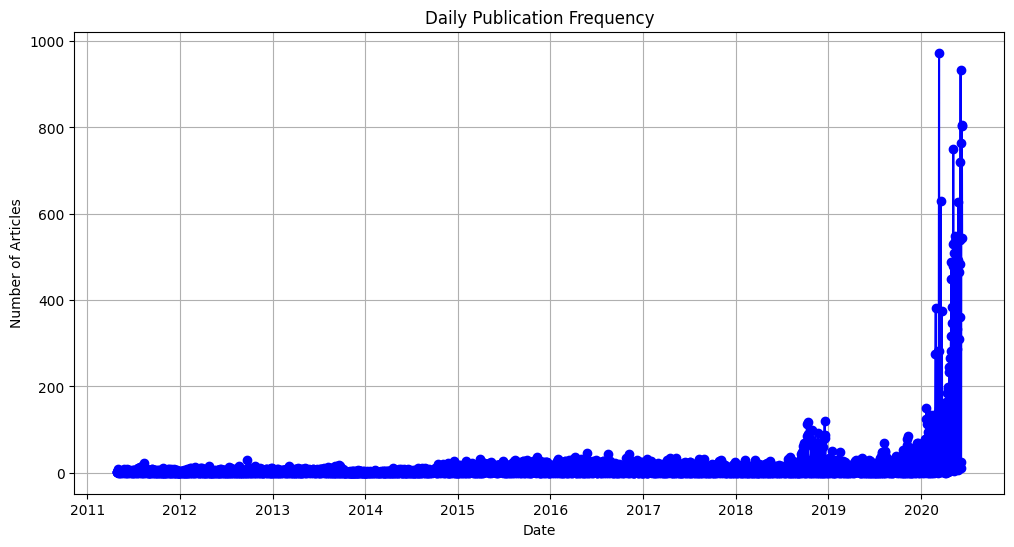

In [23]:
import pandas as pd
import matplotlib.pyplot as plt


# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Resample by day to see daily publication counts
df_daily = df.set_index('date').resample('D').size()

# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(df_daily, marker='o', linestyle='-', color='b')
plt.title('Daily Publication Frequency')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()


In [26]:

# Extract domains if publishers are email addresses
df['publisher_domain'] = df['publisher'].apply(lambda x: x.split('@')[-1] if '@' in x else x)

# Count contributions by publisher or domain
publisher_counts = df['publisher_domain'].value_counts()

# Display the top publishers
print(publisher_counts)

# Analyze the type of news reported (optional, depending on data availability)
# Example: Categorize headlines into groups like "Price Target", "Stock Movement", etc.
df['category'] = df['headline'].apply(lambda x: 'Price Target' if 'Price Target' in x else 'Stock Movement' if 'Moving' in x else 'Other')

# Group by publisher and category
category_analysis = df.groupby(['publisher_domain', 'category']).size().unstack(fill_value=0)

# Display the analysis
print(category_analysis)


publisher_domain
Benzinga Newsdesk    14750
Lisa Levin           12408
ETF Professor         4362
Paul Quintaro         4212
Benzinga Newsdesk     3177
                     ...  
Investor Ideas           1
JC Parets                1
John Harris              1
Alex Biles               1
Usman Rafi               1
Name: count, Length: 223, dtype: int64
category          Other  Price Target  Stock Movement
publisher_domain                                     
AARP                  3             0               0
Aaron Jackson.Ed      1             0               0
Aaron Levitt         12             0               0
Abe Raymond           3             0               0
Abhi Rao              1             0               0
...                 ...           ...             ...
Zoheb Sait            3             0               0
benzinga.com        273           923               0
gmail.com             0             3               0
lbjacobi              2             0               0

In [30]:
df1 = pd.read_csv('../Data/AMZN_historical_data.csv')
df.head()


,Unnamed: 0,headline,url,publisher,date,stock,headline_length,day_of_week,sentiment,publisher_domain,category
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39,Friday,neutral,Benzinga Insights,Other
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42,Wednesday,neutral,Benzinga Insights,Other
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29,Tuesday,neutral,Lisa Levin,Other
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,44,Friday,neutral,Lisa Levin,Stock Movement
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,87,Friday,positive,Vick Meyer,Price Target


In [39]:
import talib

# Calculate Simple Moving Average (SMA)
df['SMA'] = talib.SMA(df['Close'], timeperiod=14)

# Calculate Relative Strength Index (RSI)
df['RSI'] = talib.RSI(df['Close'], timeperiod=14)

# Calculate Moving Average Convergence Divergence (MACD)
df['MACD'], df['MACD_signal'], df['MACD_hist'] = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

# Check the DataFrame to see if indicators are added
df.head()


ModuleNotFoundError: No module named 'talib'

In [37]:
import pynance as pn

# Example: Fetching financial metrics
stock_data = pn.data.get('AAPL')  # Example for Apple stock data
print(stock_data.head())

# Calculate returns
df['Returns'] = df['Close'].pct_change()


ModuleNotFoundError: No module named 'pynance'